# 빅데이터 분석 06

- 머신러닝
- 회귀 예측

## 머신러닝 

- 수치화 (quantify)

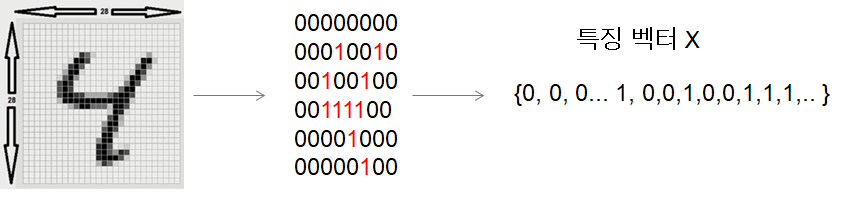

- 학습 (train) : 지도 학습 

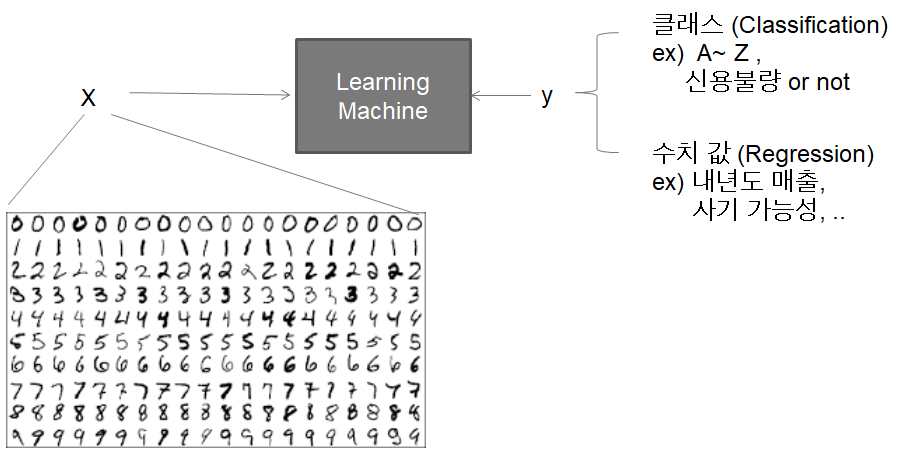

- 활용 (test)

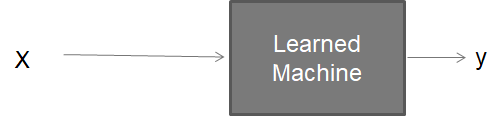


## regression (회귀 예측)

### 선형 회귀 모델 

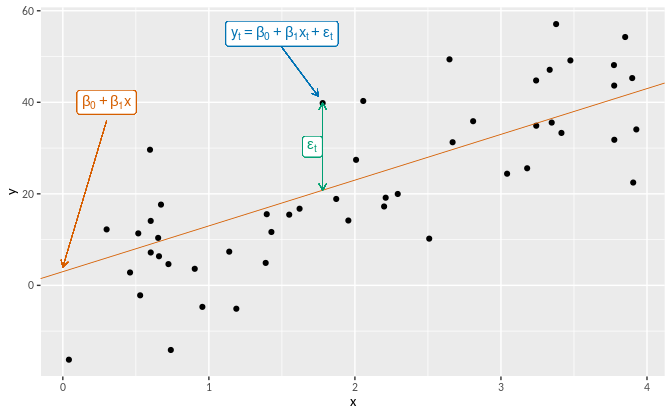


In [1]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

### - 머신러닝 패키지 sklearn 설치

In [ ]:
#!pip install sklearn

---

## 집값 예측

## 1) 데이터 수집

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
boston =  load_boston()

## 2) 데이터 준비 및 탐색

- boston.DESCR : 데이터 설명
- boston.data : X 데이터
- boston.feature_names: X 데이터 feature names
- boston.target : y 데이터

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- dataframe.shape : 보편적 데이터 형태 조회

In [6]:
print('보스톤 주택 가격 데이터 형태 : ', boston_df.shape)

보스톤 주택 가격 데이터 형태 :  (506, 14)


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 3) 모델 training

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
# X, Y 분할하기
Y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1, inplace=False)

print(X.shape, Y.shape)

(506, 13) (506,)


- train_test_split (X, Y, test_size=비율, random_state= 결과재현을 위한 random seed고정)

In [10]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

print( X_train.shape)
print( Y_train.shape)
print (Y_train) # row index, Y value 

(354, 13)
(354,)
49     19.4
19     18.2
261    43.1
503    23.9
72     22.8
       ... 
63     25.0
485    21.2
418     8.8
204    50.0
44     21.2
Name: PRICE, Length: 354, dtype: float64


In [11]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [12]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [13]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)
Y_predict

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641,
       17.66341192, 30.32844101, 17.8513932 , 10.86187069, 12.83177966,
       21.18350434, 16.41212257, 28.66817527, 37.01110952, 23.42172197,
       24.56906089, 14.55434775, 11.51023436, 30.27784089, 23.48027467,
       22.86210577, 17.61623753, 21.2528808 , 17.29802868, 34.06118291,
        7.19879841, 13.39928425, 19.4234468 , 13.2423286 ,  8.3336837 ,
       29.34933073, 11.83768837, 19.84125562, 23.97623235, 16.34351261,
       13.20973749, 14.3352014 , 17.26323753, 17.37091562, 23.84644351,
       32.8390912 ,  9.3866759 , 19.06694335, -3.98840206, 19.87721947,
       21.26003361, 24.17775745, 35.35923599, 20.32415303, 28.23212889,
       32.67560962, 40.83910565, 41.19126206, 19.78588457, 25.0134137 ,
       24.13111046, 19.62715719, 33.49344219, 23.61402811, 15.31513017,
       22.70657074, 25.78436589, 23.99723589,  8.78013424, 21.81929237,
       39.68193998, 32.8907251 , 30.20417723, 14.35610647, 23.56

## 4) 결과 분석 

### regression  모델 정보

In [14]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))


Y 절편 값:  40.995595172164336
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [15]:
coef = pd.Series(data =lr.coef_, index=X.columns)

print (coef)

CRIM       -0.112980
ZN          0.065512
INDUS       0.034437
CHAS        3.045898
NOX       -19.795832
RM          3.354969
AGE         0.005937
DIS        -1.741854
RAD         0.355884
TAX        -0.014295
PTRATIO    -0.920180
B           0.010397
LSTAT      -0.566182
dtype: float64


### regression 성능 지표

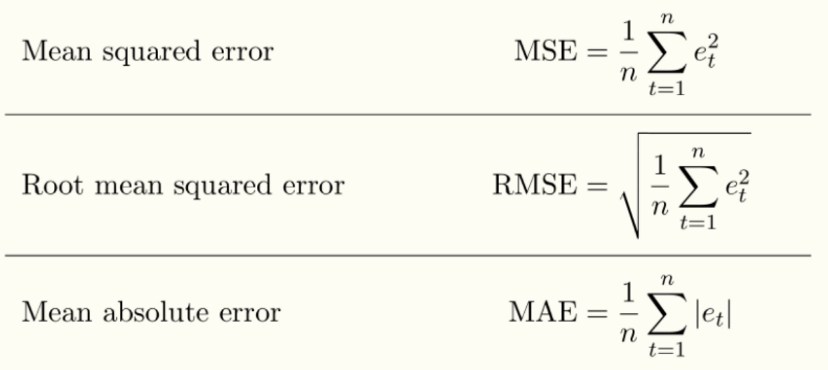

In [16]:
print ( Y_predict)
print ( Y_test)

[23.15424087 19.65590246 36.42005168 19.96705124 32.40150641 17.66341192
 30.32844101 17.8513932  10.86187069 12.83177966 21.18350434 16.41212257
 28.66817527 37.01110952 23.42172197 24.56906089 14.55434775 11.51023436
 30.27784089 23.48027467 22.86210577 17.61623753 21.2528808  17.29802868
 34.06118291  7.19879841 13.39928425 19.4234468  13.2423286   8.3336837
 29.34933073 11.83768837 19.84125562 23.97623235 16.34351261 13.20973749
 14.3352014  17.26323753 17.37091562 23.84644351 32.8390912   9.3866759
 19.06694335 -3.98840206 19.87721947 21.26003361 24.17775745 35.35923599
 20.32415303 28.23212889 32.67560962 40.83910565 41.19126206 19.78588457
 25.0134137  24.13111046 19.62715719 33.49344219 23.61402811 15.31513017
 22.70657074 25.78436589 23.99723589  8.78013424 21.81929237 39.68193998
 32.8907251  30.20417723 14.35610647 23.56129992 13.6987184  32.17099211
 36.43647957 27.41243794 21.43887413 29.94548936 20.80737308 26.76489459
 23.19924205 18.7295963  30.4434358  17.92366103 19.9

In [17]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))


MSE : 17.297, RMSE : 4.159


### correlation

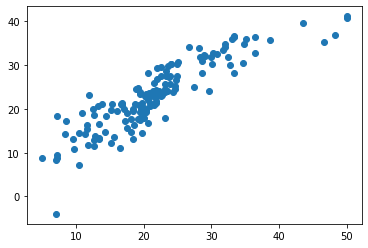

In [18]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_predict)

In [19]:
import scipy.stats as stats
print ( stats.pearsonr( Y_test, Y_predict))

(0.8860534782188996, 6.0822275878440874e-52)


## 5)  시각화하기

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

- sns.regplot( x= X column, y= Y column, data= 데이터)

<AxesSubplot:xlabel='CRIM', ylabel='PRICE'>

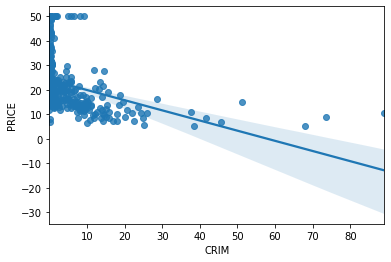

In [21]:
sns.regplot( x='CRIM', y= 'PRICE', data= boston_df)

- fig, axs = plt.subplots( figsize=(x크기, y크기), ncols= x칸, nrows=y칸)
- sns.regplot (  ....,  ax=axs[row][col]) 

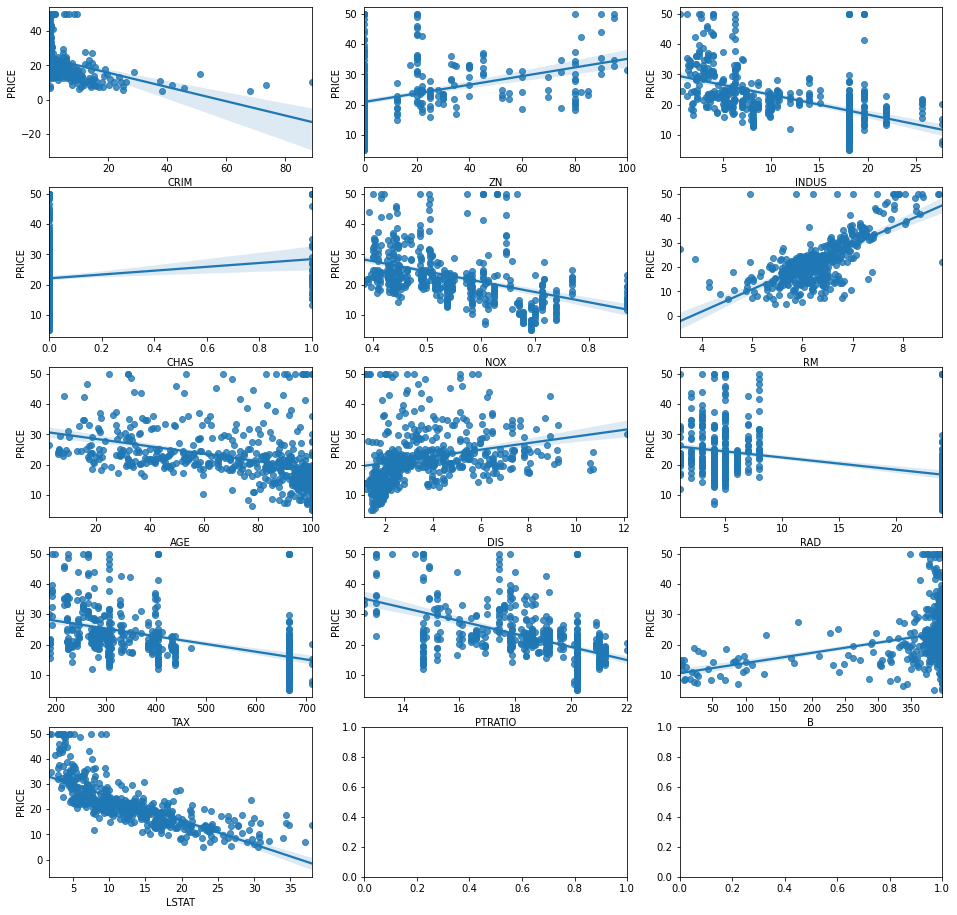

In [22]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

## 과제1 : 주택 가격으로부터 범죄율을 예측하는 모델을 만들고, 예측 결과의 상관계수를 계산하시오 

In [35]:
import numpy as np
import pandas as pd
import scipy.stats as stats

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


boston =  load_boston()

boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
X = boston_df['PRICE'][:, np.newaxis]
Y = boston_df['CRIM']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

print ( stats.pearsonr( Y_test, Y_predict))

(0.423000010568737, 5.664070964208682e-08)


--- 

## 자동차연비 예측

## 1) 데이터 수집

https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [36]:
import numpy as np
import pandas as pd 

data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')

## 2) 데이터 준비 및 탐색

In [37]:
print(' 데이터셋 크기 : ', data_df.shape)

data_df.head()

 데이터셋 크기 :  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [38]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### - 분석하지 않을 변수 제외하기

- car_name : string
- origin : 명목변수 (크기가 의미가 없음)


In [39]:
#data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)
data_df = data_df.drop(['car_name', 'origin'], axis=1, inplace=False)


- 결측치 처리

In [40]:
# error 남
data_df.horsepower= data_df.horsepower.astype('int')

ValueError: invalid literal for int() with base 10: '?'

In [41]:
#data_df['horsepower']=='?'
data_df[data_df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


- 결측치 처리 : horsepower , "?" 라는 값이 있어서 object로 처리됨
    - 결측치로 마킹 :  replace ('?', NaN)
    - record 전체를 날리거나, 대체값 넣어주기 : dropna, fillna

In [42]:
data_df.horsepower=data_df.horsepower.replace('?', np.NaN)
print ( data_df.shape)
data_df=data_df.dropna()
print ( data_df.shape)

(398, 7)
(392, 7)


In [43]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


In [44]:
data_df.horsepower= data_df.horsepower.astype('int')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 23.0 KB


## 3) 모델 training

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# X, Y 분할하기

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

In [47]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [48]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [49]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [50]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

## 4) 결과 분석 및 시각화

In [51]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -12.14
회귀 계수 값:  [-0.28  0.   -0.   -0.01  0.05  0.72]


In [52]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))


MSE : 12.406, RMSE : 3.522


In [53]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
#coef.sort_values(ascending=False)
coef

cylinders      -0.28
displacement    0.00
horsepower     -0.00
weight         -0.01
acceleration    0.05
model_year      0.72
dtype: float64

### - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

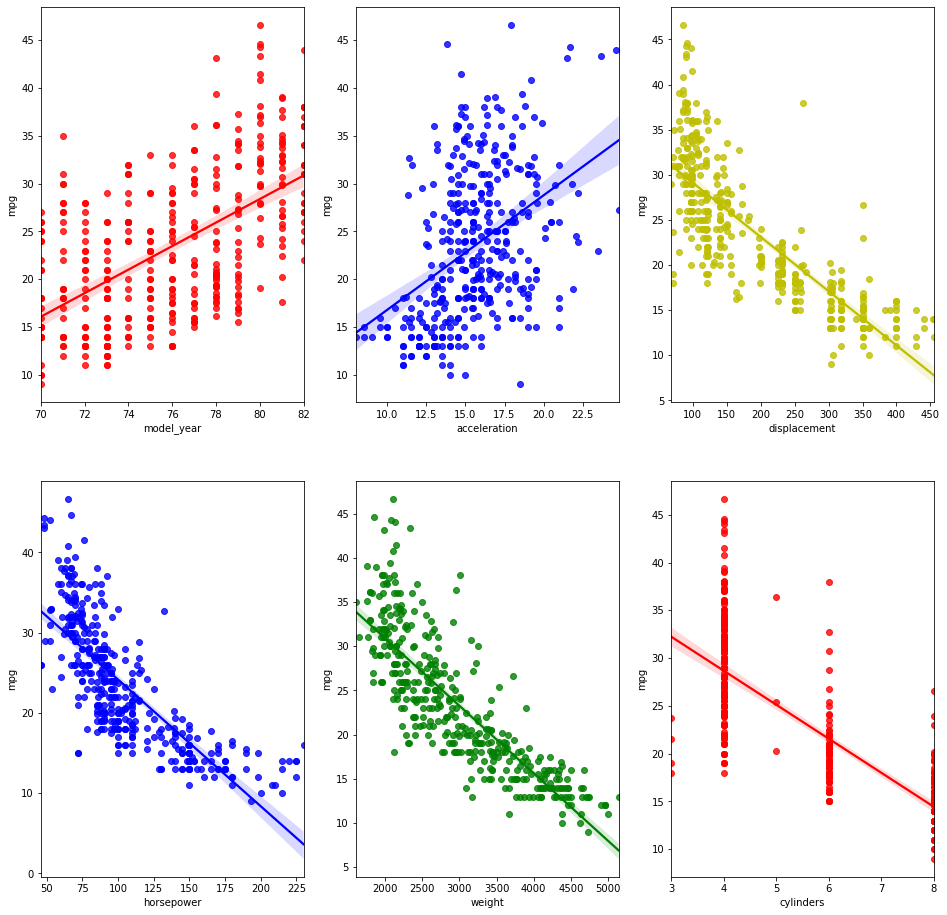

In [55]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'horsepower','weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'b','g', 'r']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

## 과제2 : horsepower를 1/10 로 줄이고, 회귀계수가 어떻게 변하는지 본다. 

In [67]:
data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')
data_df = data_df.drop(['car_name', 'origin'], axis=1, inplace=False)
data_df[data_df['horsepower']=='?']
data_df.horsepower=data_df.horsepower.replace('?', np.NaN)
data_df=data_df.dropna()
data_df.horsepower= data_df.horsepower.astype('int')

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, Y_train)

coef = pd.Series(data=np.round(lr.coef_, 5), index=X.columns)
print(coef)

X_train['horsepower'] = X_train['horsepower'] / 10

lr = LinearRegression()
lr.fit(X_train, Y_train)

coef = pd.Series(data=np.round(lr.coef_, 5), index=X.columns)
print('\nhorsepower를 1/10 로 줄일때\n')
print(coef)

cylinders      -0.28303
displacement    0.00206
horsepower     -0.00058
weight         -0.00633
acceleration    0.04813
model_year      0.72036
dtype: float64

horsepower를 1/10 로 줄일때

cylinders      -0.28303
displacement    0.00206
horsepower     -0.00579
weight         -0.00633
acceleration    0.04813
model_year      0.72036
dtype: float64


horsepower의 회귀계수가 약 10배 커진다.

###   <<<< 연비 예측하기  >>>>

In [68]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders (%d ~ %d): "%(data_df['cylinders'].min(), data_df['cylinders'].max())))
displacement_1 = int(input("displacement (%d ~ %d): "%(data_df['displacement'].min(), data_df['displacement'].max())))
horsepower_1=int(input("horsepower (%d ~ %d): "%(data_df['horsepower'].min(), data_df['horsepower'].max())))
weight_1 = int(input("weight (%f ~ %f): "%(data_df['weight'].min(), data_df['weight'].max())))
acceleration_1 = int(input("acceleration (%f ~ %f): "%(data_df['acceleration'].min(), data_df['acceleration'].max())))
model_year_1 = int(input("model_year (%f ~ %f): "%(data_df['model_year'].min(), data_df['model_year'].max())))

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders (3 ~ 8): 4
displacement (68 ~ 455): 300
horsepower (46 ~ 230): 200
weight (1613.000000 ~ 5140.000000): 3200
acceleration (8.000000 ~ 24.800000): 16
model_year (70.000000 ~ 82.000000): 71


In [69]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, horsepower_1, weight_1, acceleration_1 , model_year_1]])

In [70]:
print("이 자동차의 예상 연비(mpg)는 %.2f 입니다." %mpg_predict)

이 자동차의 예상 연비(mpg)는 17.83 입니다.


## 5) 결과 개선 

- 다른 regression model
- parameter tuning 
- feature selection

### 모델 변경
- linear regression
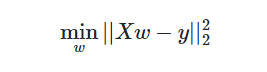

- ridge regression : 계수의 영향력을 줄이기 위함
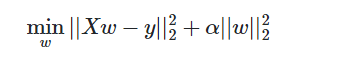

In [71]:
from sklearn import linear_model

models= [ LinearRegression(), linear_model.Ridge(alpha=.5) ]

for m in models:
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print (mse)
    

13.39303269607656
13.390242506241647


### parameter tuning

In [72]:

for al in range(0, 10):
    m= linear_model.Ridge(alpha=al/10) 
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print (al/10, mse)

0.0 13.393032696078004
0.1 13.392451267916622
0.2 13.391881601591463
0.3 13.391323630088072
0.4 13.390777286943628
0.5 13.390242506241647
0.6 13.389719222608749
0.7 13.389207371208633
0.8 13.388706887733996
0.9 13.38821770840575


### feature selection

- 사용할 feature 선택
- K-best : feature 중 score가 높은 것 k 개 선택
- transform : k개 만 남기는 걸로 변환

cylinders: 446.134943
displacement: 527.529285
horsepower: 396.478741
weight: 644.453345
acceleration: 49.032603
model_year: 139.859001


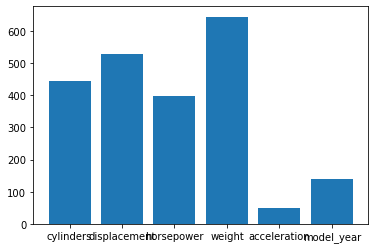

In [73]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test, k):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test,6)

for i in range(len(fs.scores_)):
	print('%s: %f' % (X_test.columns[i], fs.scores_[i]))
# plot the scores
pyplot.bar(X_test.columns, fs.scores_)
pyplot.show()

In [74]:
# 하나 씩 늘려가면서 score 보기

for k in range(1,7) :
    X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test, k)

    m= LinearRegression()
    m.fit(X_train_fs, Y_train)
    Y_predict= m.predict(X_test_fs)
    mse = mean_squared_error(Y_test, Y_predict)
    print (k,  mse)

1 20.64191198018737
2 20.60807229901392
3 20.62304769685363
4 1037.3750778643048
5 40.159711119255455
6 13.39303269607656


## 6) validation, test 

- 파라메터 선택 => 결과에 많은 영향을 줌
- test set을 이용한 파라메터 선택은 test set 에 fit 되었다고 볼 수도 있음
- 해결 방향 : 파라메터 선택을 위한 validation set과, 성능 평가를 위한 test set을 분리



In [75]:
# 6:2:2  split
X_train, X_tv, Y_train, Y_tv = train_test_split(X, Y, test_size=0.3, random_state=0)
X_test, X_validation, Y_test, Y_validation = train_test_split(X_tv, Y_tv, test_size=0.5, random_state=0)
print (X_train.shape, X_validation.shape, X_test.shape)

(274, 6) (59, 6) (59, 6)


In [76]:
# 파라메터 선택  : alpha =0 
for al in range(0, 10):
    m= linear_model.Ridge(alpha=al/10) 
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_validation)
    #print (Y_validation, Y_predict)
    mse = mean_squared_error(Y_validation, Y_predict)
    print (al/10, mse)

0.0 14.423513112564427
0.1 14.42361315889461
0.2 14.423713275517708
0.3 14.423813461757662
0.4 14.423913716944545
0.5 14.424014040414468
0.6 14.42411443150952
0.7 14.424214889577792
0.8 14.42431541397322
0.9 14.424416004055633


In [ ]:
# test 
m= linear_model.Ridge(alpha=0/10) 
m.fit(X_train, Y_train)
Y_predict= m.predict(X_test)
mse = mean_squared_error(Y_test, Y_predict)
print (mse)


## 7) train, test data 에 따라 달라지는 결과 


In [ ]:
for i in range(0, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    m= linear_model.Ridge(alpha=0/10) 
    m.fit(X_train, Y_train)
    Y_predict= m.predict(X_test)
    mse = mean_squared_error(Y_test, Y_predict)
    print (mse)

## cross validation

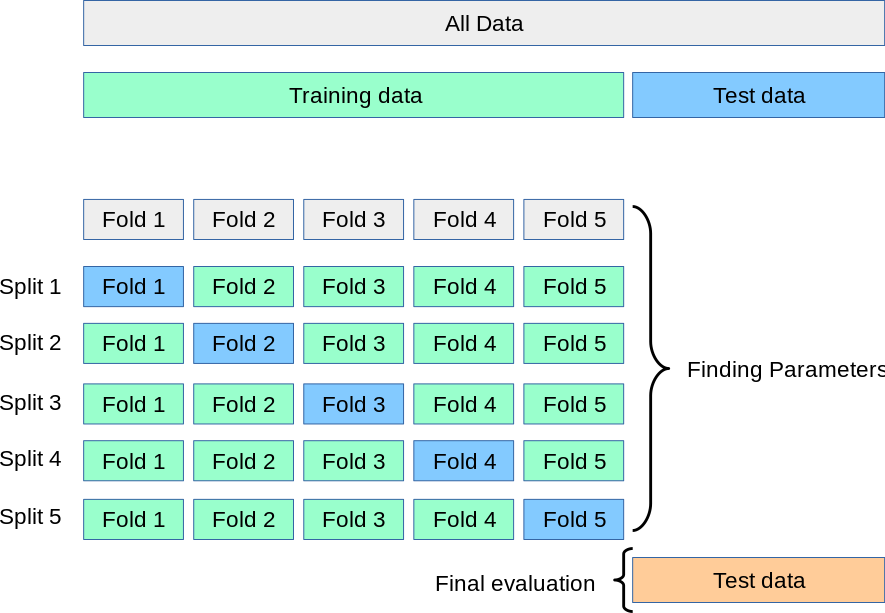

- KFold- 고정 분할

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, make_scorer

m= linear_model.Ridge(alpha=0/10) 
scores= cross_validate(m, X, Y, cv=5 , scoring=make_scorer(mean_squared_error))

print ( scores['test_score'])


- KFold - random 추출

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer
kfold=KFold(n_splits=5, shuffle=True, random_state=0) # shuffle = False 면 고정 추출
scores= cross_val_score(m, X, Y, cv=kfold, scoring=make_scorer(mean_squared_error))
print (score)